In [249]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier

In [250]:
#Confusion Matrix Function
def confusionmatrix(X,Y,Z):
    y_actu = pd.Series(X, name='Actual')
    y_pred = pd.Series(Y, name='Predicted')

    confusionMatrix = confusion_matrix(y_actu, y_pred)
    df_cm = pd.DataFrame(confusionMatrix, index = [i for i in Z],
                  columns = [i for i in Z])
    df_cm.iloc[:,:] = Normalizer(norm='l1').fit_transform(df_cm)
    plt.figure(figsize = (20,10))
    sn.heatmap(df_cm, annot=True)

In [239]:
#Loading the data set - training data & Test data
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)

In [240]:
# Building a pipeline: We can write less code and do all of the above, by building a pipeline as follows:
# We will be using the 'text_clf' going forward.

text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

text_clf = text_clf.fit(twenty_train.data, twenty_train.target)

In [254]:
#Naive Bayes Classifier
Training_NB=text_clf.predict(twenty_train.data)
print(np.mean(Training_NB == twenty_train.target))
predicted_NB = text_clf.predict(twenty_test.data)
print(np.mean(predicted_NB == twenty_test.target))

0.9326498143892522
0.7738980350504514


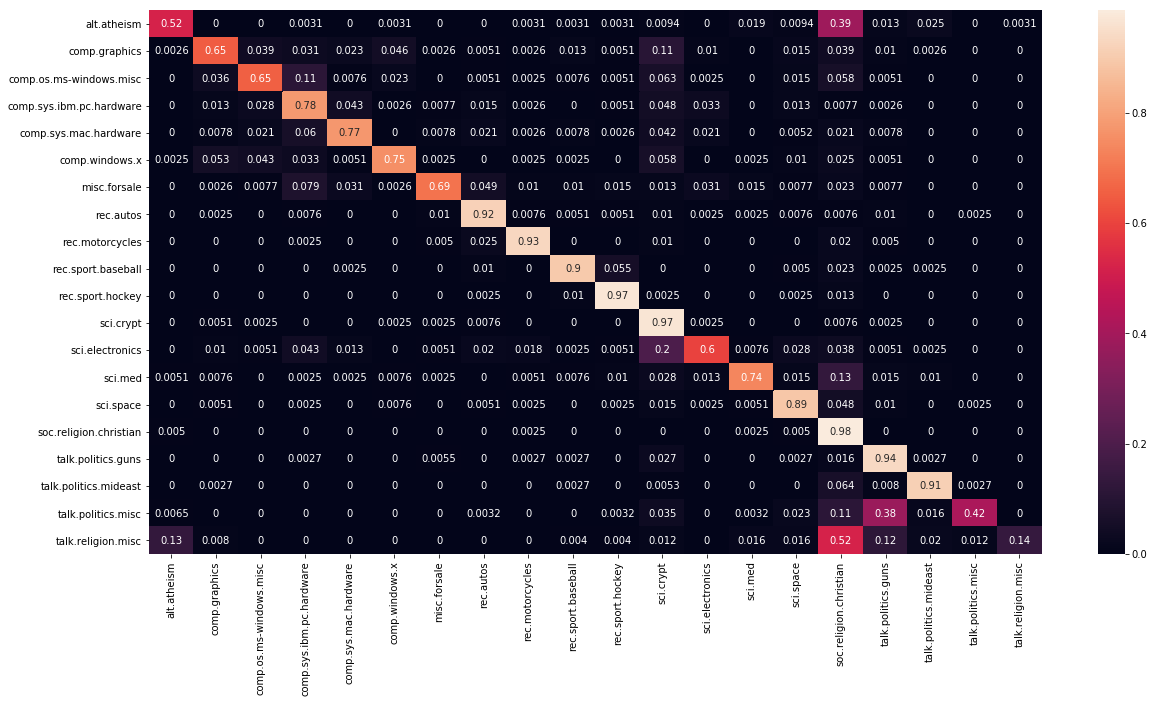

In [243]:
#Confusion Matrix
confusionmatrix(X=twenty_test.target,Y=predicted_NB,Z=twenty_train.target_names)

In [256]:
# Training Support Vector Machines - SVM and calculating its performance
text_clf_svm = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, n_iter=5, random_state=42))])

text_clf_svm = text_clf_svm.fit(twenty_train.data, twenty_train.target)
Training_svm= text_clf_svm.predict(twenty_train.data)
print(np.mean(Training_svm == twenty_train.target))
predicted_svm = text_clf_svm.predict(twenty_test.data)
print(np.mean(predicted_svm == twenty_test.target))

C:\Users\rosha\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.966590065405692
0.8238183749336165


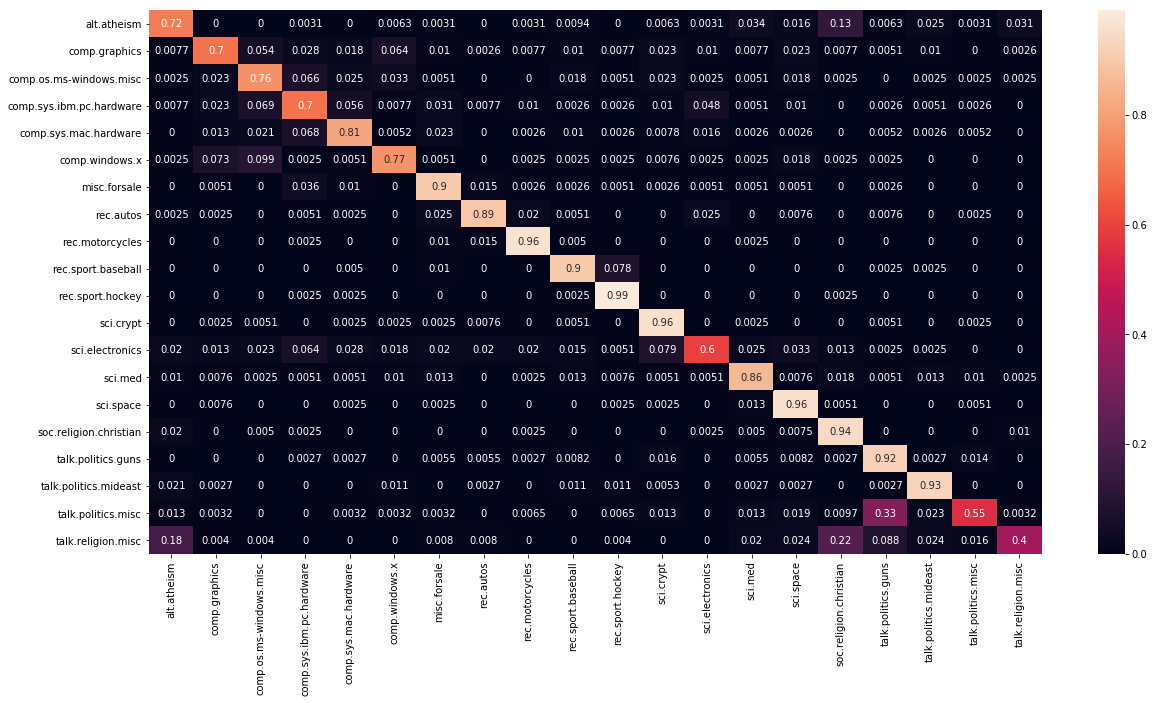

In [244]:
#Confusion Matrix
confusionmatrix(X=twenty_test.target,Y=predicted_svm,Z=twenty_train.target_names)

In [260]:
#Random Forest classifier
text_clf_RF = Pipeline([('vect', CountVectorizer()),
                       ('tfidf', TfidfTransformer()),
                       ('clf-RF', RandomForestClassifier(n_estimators=100,max_depth=35,random_state=100))])
text_clf_RF.fit(twenty_train.data, twenty_train.target)
Training_RF= text_clf_svm.predict(twenty_train.data)
print(np.mean(Training_RF == twenty_train.target))
predicted_RF = text_clf_RF.predict(twenty_test.data)
print(np.mean(predicted_RF == twenty_test.target))

0.966590065405692
0.7511949017525226


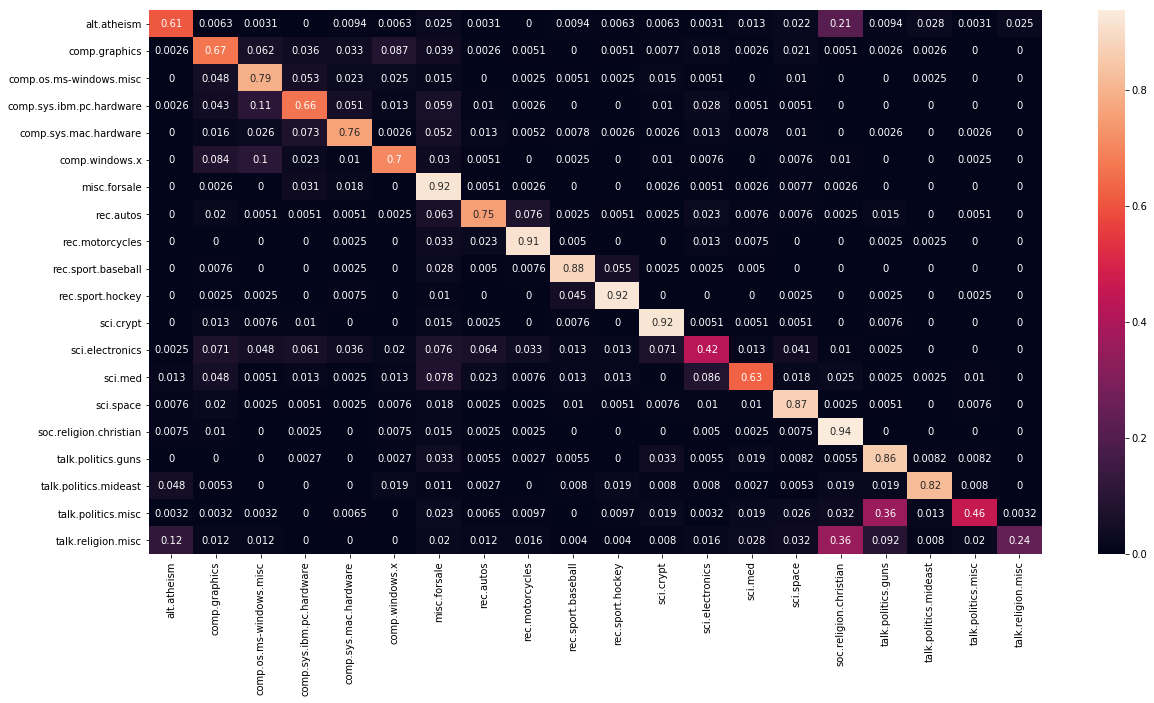

In [245]:
#Confusion Matrix
confusionmatrix(X=twenty_test.target,Y=predicted_RF,Z=twenty_train.target_names)